## Autoencoders - Simple Example

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers

We will generate some random 3D data using the `make_classification` [scikit-learn function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) 

In [4]:
from sklearn.datasets import make_blobs, make_classification
X,y = make_classification(n_samples=500, n_features=3, n_redundant=0,
                          random_state=10, class_sep=.5)

Then, let's check what the generated data looks like:

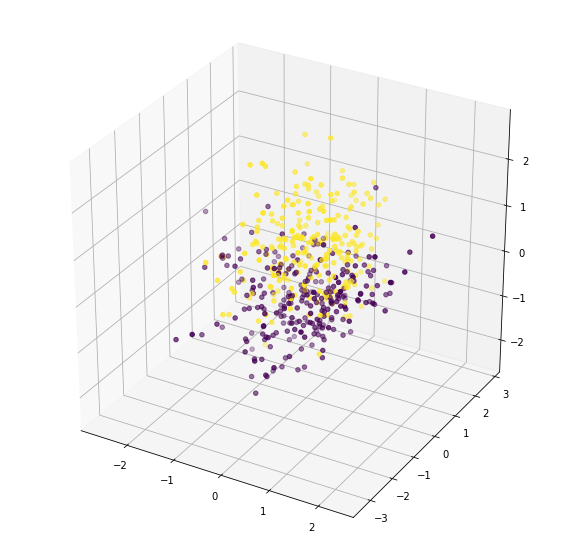

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

Now we will build the autoencoder for the data that we've just generated. 
This autoencoder has only one hidden layer for the encoder and one for the decoder.

Our goal here is to reduce the dimensionality of the date from the $\mathcal{R}^3$ to $\mathcal{R}^2$.

In [ ]:
encoding_dim = 2

input_layer = keras.Input(shape=(3,))
encoded = layers.Dense(encoding_dim, activation="sigmoid")(input_layer)
decoded = layers.Dense(3, activation="sigmoid")(encoded)
autoencoder = keras.Model(input_layer, decoded)

We need to build separate models for the encoder and the decoder in order to evaluate their quality.

In [ ]:
encoder = keras.Model(input_layer, encoded)

encoded_input = keras.Input(shape=(encoding_dim,)) #the size of the encoder output

decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

We will train our model using the MSE loss function and the stochastic gradient descent optimizer:

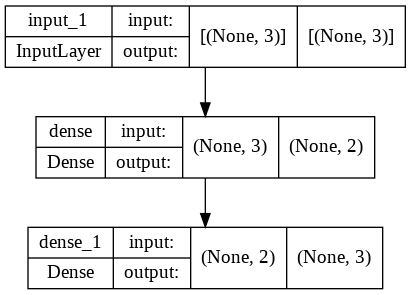

In [ ]:
autoencoder.compile(loss="mse", optimizer="SGD")
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True)

We will perform the training of our model for 100 epochs

In [ ]:
history = autoencoder.fit(X, X, epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 4s 6ms/step - loss: 0.9979
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9930
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.9881
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.9834
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9787
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9740
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.9694
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.9649
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9605
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9561
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 0.9518
Epoch 12/100
16/16 [==============================] - 0s 4ms/step - loss: 0.9476
Epoch 13/100
16/16 [=================

Now, we will check what the latent space may look like:

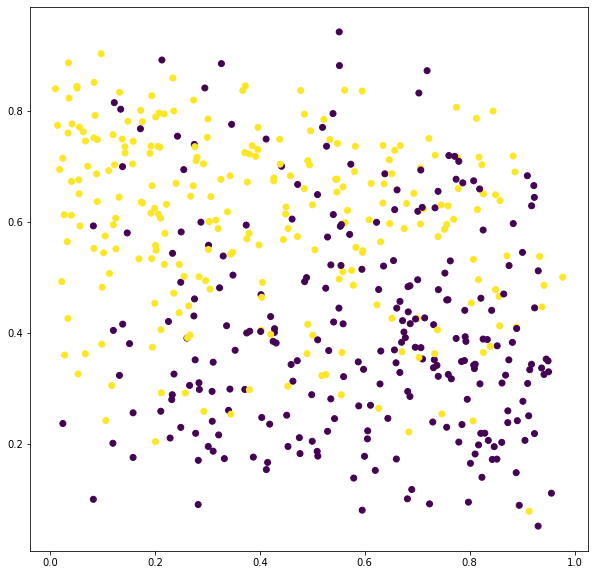

In [ ]:
codings = encoder.predict(X)
fig = plt.figure(figsize=(10,10))
plt.scatter(codings[:,0], codings[:, 1], c=y)
plt.show()

In [6]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [8]:
# This is the size of our encoded representations
encoding_dim = 100 

# This is our input image
input_img = keras.Input(shape=(784,))

# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
#decoded = layers.Dense(784, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='relu')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [9]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 784)               79184     
                                                                 
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [10]:
autoencoder.compile(optimizer='adam', loss='mse')

In [11]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=2)

Epoch 1/100
235/235 - 4s - loss: 0.0411 - val_loss: 0.0230 - 4s/epoch - 17ms/step
Epoch 2/100
235/235 - 1s - loss: 0.0199 - val_loss: 0.0181 - 823ms/epoch - 4ms/step
Epoch 3/100
235/235 - 1s - loss: 0.0165 - val_loss: 0.0157 - 820ms/epoch - 3ms/step
Epoch 4/100
235/235 - 1s - loss: 0.0150 - val_loss: 0.0147 - 838ms/epoch - 4ms/step
Epoch 5/100
235/235 - 1s - loss: 0.0141 - val_loss: 0.0138 - 1s/epoch - 6ms/step
Epoch 6/100
235/235 - 1s - loss: 0.0135 - val_loss: 0.0133 - 1s/epoch - 5ms/step
Epoch 7/100
235/235 - 1s - loss: 0.0130 - val_loss: 0.0128 - 1s/epoch - 6ms/step
Epoch 8/100
235/235 - 1s - loss: 0.0126 - val_loss: 0.0132 - 1s/epoch - 6ms/step
Epoch 9/100
235/235 - 1s - loss: 0.0123 - val_loss: 0.0123 - 1s/epoch - 6ms/step
Epoch 10/100
235/235 - 2s - loss: 0.0120 - val_loss: 0.0120 - 2s/epoch - 7ms/step
Epoch 11/100
235/235 - 2s - loss: 0.0117 - val_loss: 0.0121 - 2s/epoch - 7ms/step
Epoch 12/100
235/235 - 1s - loss: 0.0116 - val_loss: 0.0115 - 798ms/epoch - 3ms/step
Epoch 13/100

In [12]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

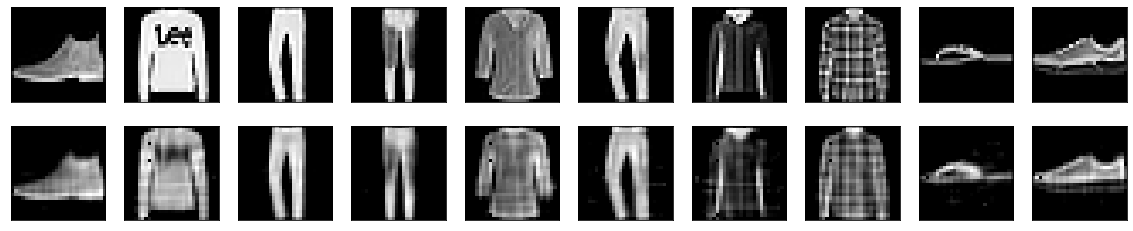

In [13]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Exercises

Use the [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) to build a simple autoencoder and perform the following tasks:
1. Try different values for the latent space size and report the diference in the reconstructed image (you will probably going to need to use better optimizers/loss functions). 
1. Employ the [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) for visualizing high-dimensional data in a two or three-dimensional map. Try to visualize what the Latent Space looks like using the [scikit-learn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).
  1. By looking at the t-SNE for the Latent Space, do you think that Autoencoders are a good tool for generating data?